## Lab | Customer Analysis Round 2

In [2]:
# Viz mantra
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [3]:
import numpy as np
import pandas as pd
import random

In [1]:
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

In [4]:
#Show DataFrame info.
marketing = pd.read_csv("Data/marketing_customer_analysis.csv")

In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

In [5]:
#Describe DataFrame.
marketing.describe()

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Show a plot of the total number of responses.

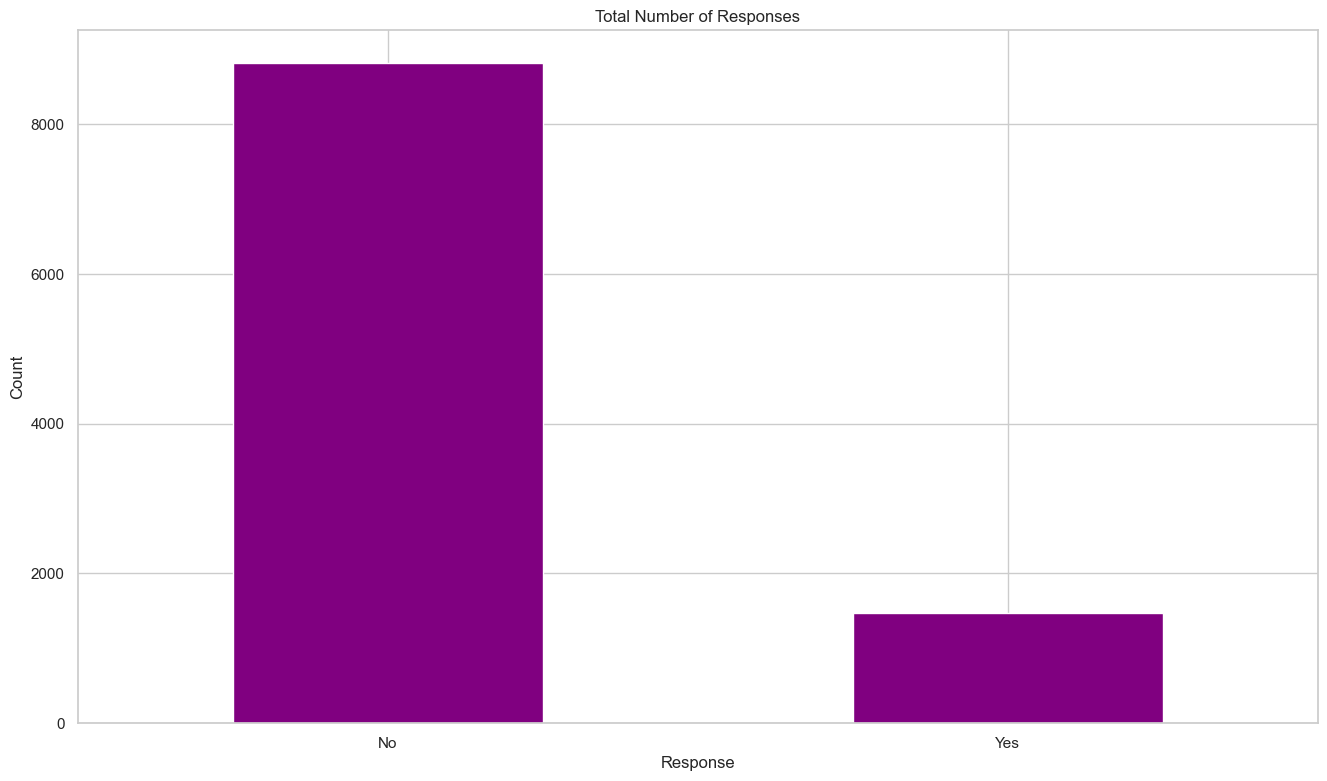

In [11]:
response_counts = marketing['Response'].value_counts()

response_counts.plot(kind='bar', color='purple')
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

Show a plot of the response rate by the sales channel.

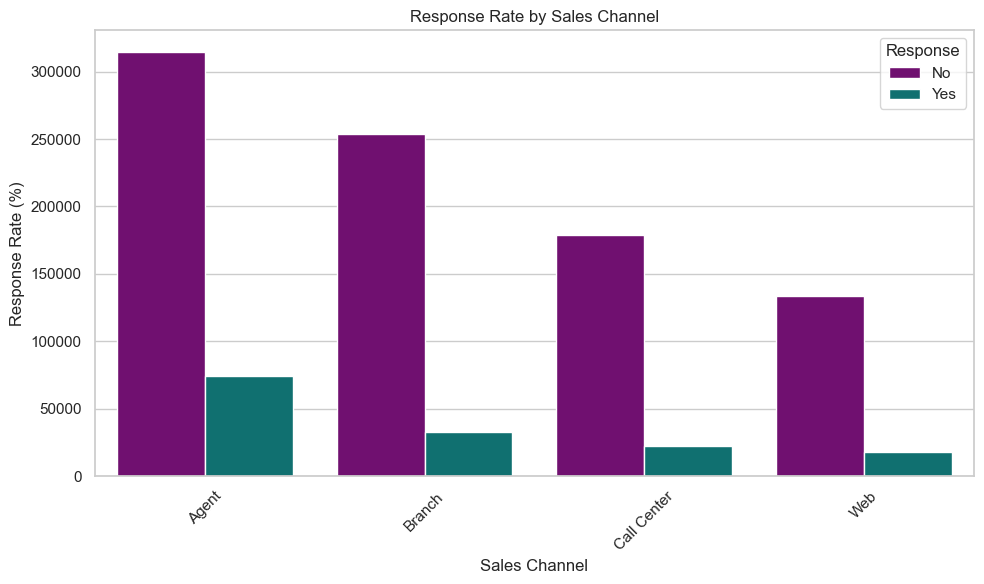

In [13]:
filtrado= marketing.dropna(subset=['Response'])#filtrar nulls de columna 'Response'
sub1 = marketing.groupby('Sales Channel')['Response'].value_counts().mul(100) #groupby y multiplicado por 100
#he buscado como hacerlo porque no me quedaba muy claro
plt.figure(figsize=(10, 6))
sns.barplot(x=sub1.index.get_level_values(0), y=sub1.values, hue=sub1.index.get_level_values(1),palette=['purple', 'teal'])
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.tight_layout()
plt.show()

Show a plot of the response rate by the total claim amount.

C:\Users\Elsa\AppData\Local\Temp\ipykernel_8544\2628256093.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub1 = filtrado.groupby(bins)['Response'].value_counts().mul(100)


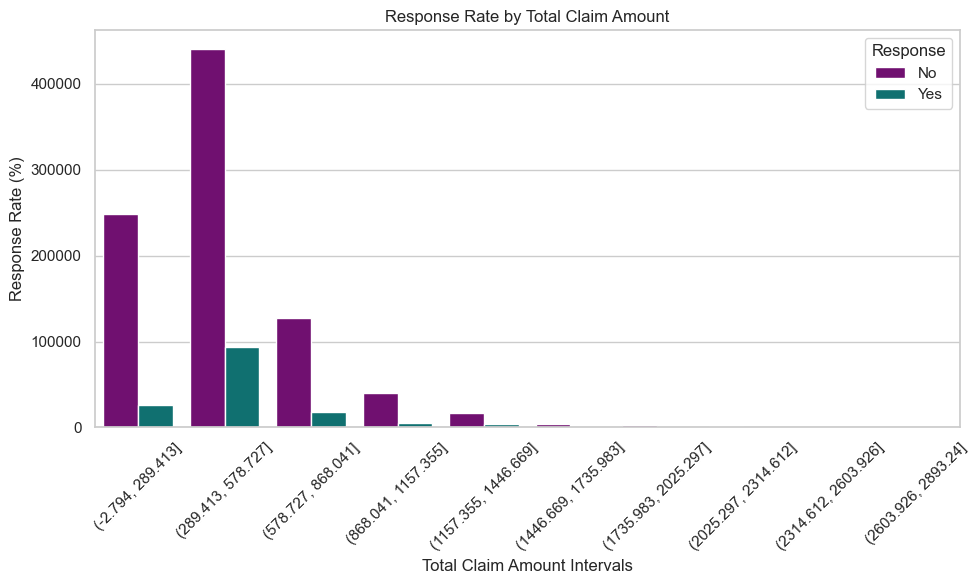

In [11]:
filtrado= marketing.dropna(subset=['Response'])#filtrar nulls de columna 'Response'
bins = pd.cut(filtrado['Total Claim Amount'], bins=10) 
sub1 = filtrado.groupby(bins)['Response'].value_counts().mul(100)

plt.figure(figsize=(10, 6))
sns.barplot(x=sub1.index.get_level_values(0), y=sub1.values, hue=sub1.index.get_level_values(1),palette=['purple', 'teal'])
plt.title('Response Rate by Total Claim Amount')
plt.xlabel('Total Claim Amount Intervals')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.tight_layout()
plt.show()

Show a plot of the response rate by income.

C:\Users\Elsa\AppData\Local\Temp\ipykernel_8544\2311761021.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sub1 = filtrado.groupby(bins)['Response'].value_counts().mul(100)


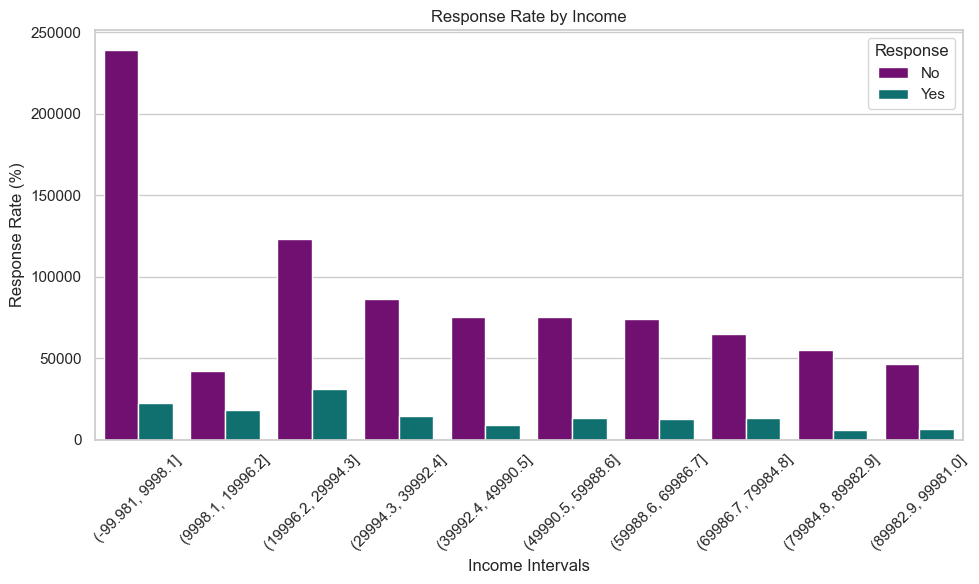

In [15]:
filtrado= marketing.dropna(subset=['Response'])#filtrar nulls de columna 'Response'
bins = pd.cut(filtrado['Income'], bins=10) 
sub1 = filtrado.groupby(bins)['Response'].value_counts().mul(100)

plt.figure(figsize=(10, 6))
sns.barplot(x=sub1.index.get_level_values(0), y=sub1.values, hue=sub1.index.get_level_values(1),palette=['purple', 'teal'] )
plt.title('Response Rate by Income')
plt.xlabel('Income Intervals')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Response')
plt.tight_layout()
plt.show()

Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and `categorical` data types respectively)

In [17]:
marketing.dtypes

Unnamed: 0                         int64
Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim          float64
Months Since Policy Inception      int64
Number of Open Complaints        float64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size    

In [19]:
numerical = marketing.select_dtypes(include=[np.number])

In [31]:
numerical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer Lifetime Value        10910 non-null  float64
 2   Income                         10910 non-null  int64  
 3   Monthly Premium Auto           10910 non-null  int64  
 4   Months Since Last Claim        10277 non-null  float64
 5   Months Since Policy Inception  10910 non-null  int64  
 6   Number of Open Complaints      10277 non-null  float64
 7   Number of Policies             10910 non-null  int64  
 8   Total Claim Amount             10910 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 767.2 KB


In [32]:
numerical = numerical.drop('Unnamed: 0', axis=1)

In [20]:
categoricals = marketing.select_dtypes(include=[object])

Now we will try to check the distributions of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms

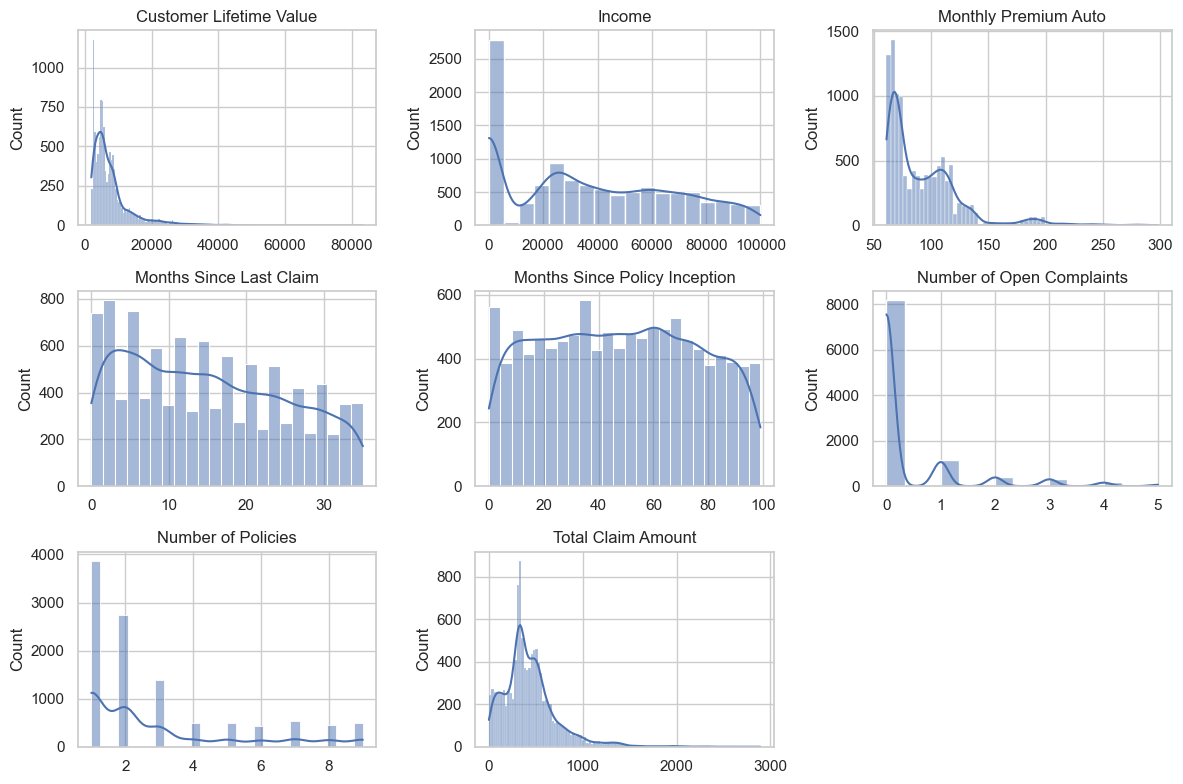

In [34]:
#distribution of numerical values:
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical.columns):
    plt.subplot(3, 3, i+1)  
    sns.histplot(numerical[column], kde=True)  
    plt.title(column)  
    plt.xlabel('')  

plt.tight_layout()
plt.show()

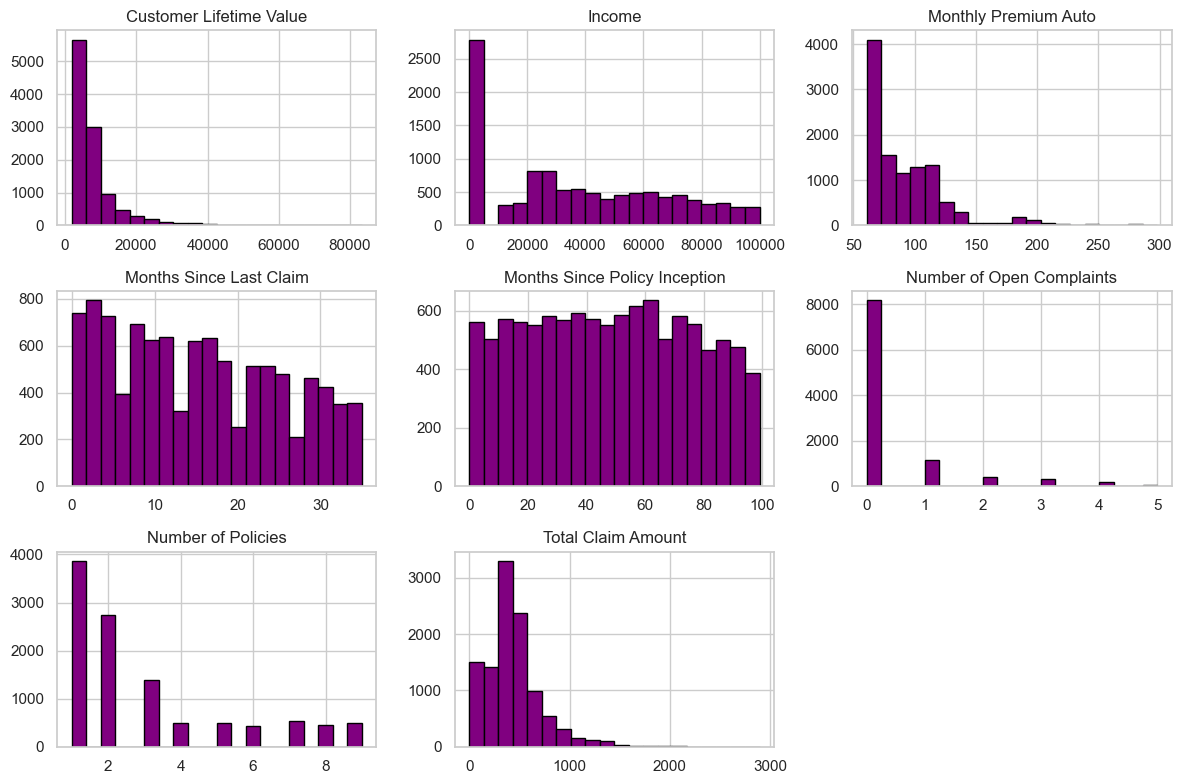

In [36]:
#matplotlib
plt.figure(figsize=(12, 8))

for i, column in enumerate(numerical.columns):
    plt.subplot(3, 3, i+1)  
    plt.hist(numerical[column], bins=20, color='purple', edgecolor='black')  
    plt.title(column) 
    plt.xlabel('')  

plt.tight_layout()
plt.show()

For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

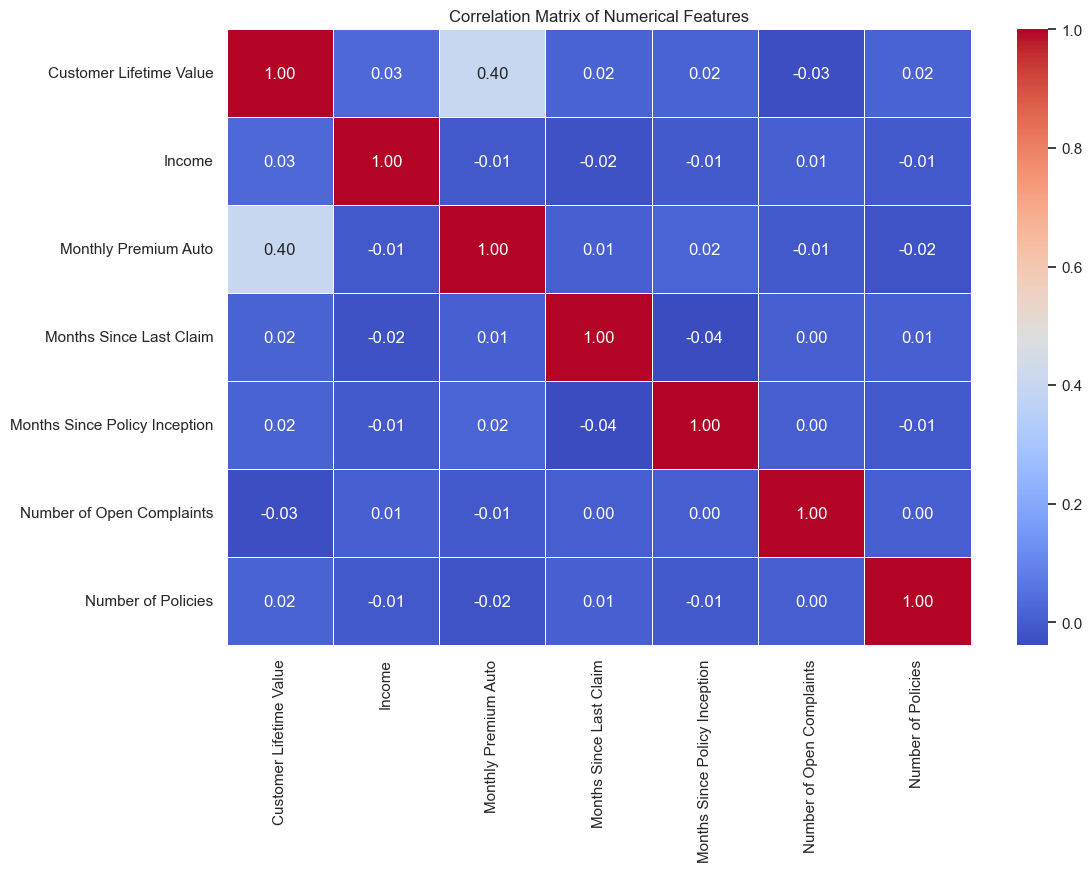

In [37]:
numerical2 = numerical.drop(columns=['Total Claim Amount'])
correlation_matrix = numerical2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

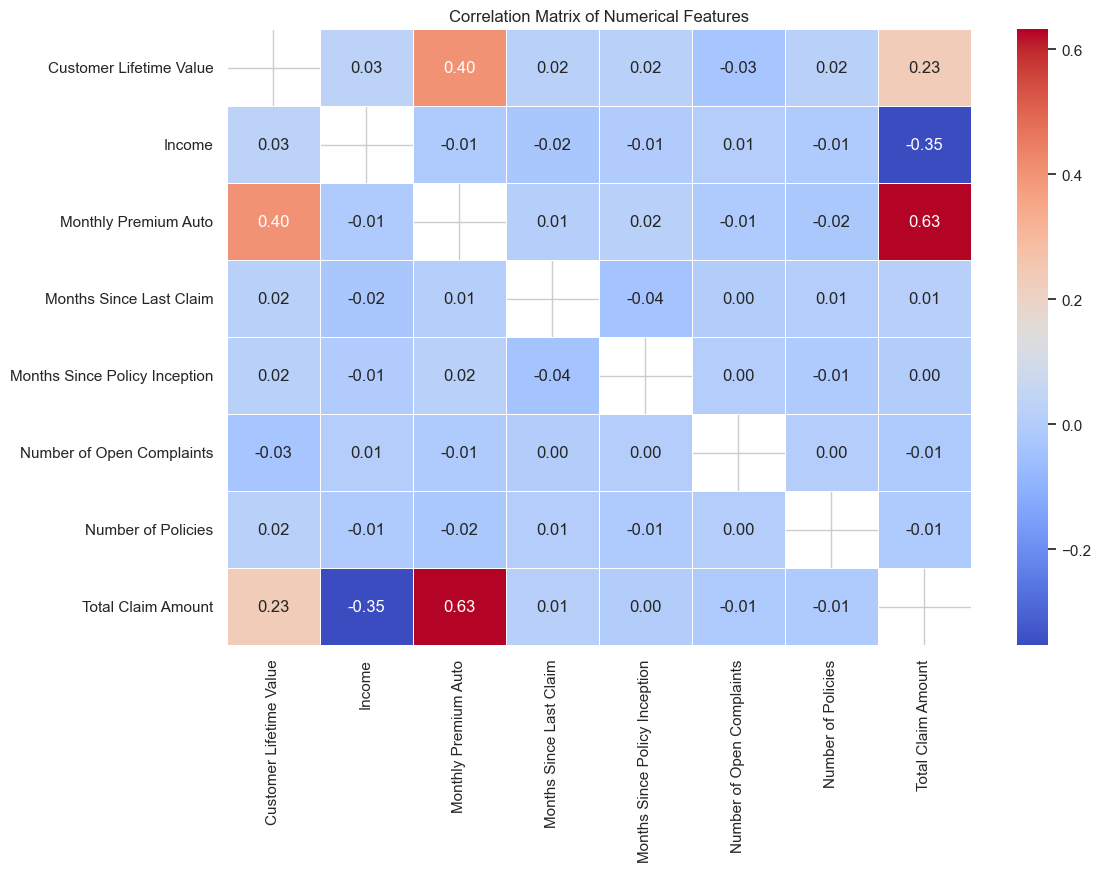

In [38]:
correlation_matrix = numerical.corr()
#identificar pares con correlación superior a 0.9
#mascara para ocultar dónde el coeficiente de correlación es superior a 0.9
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=correlation_matrix.abs() > 0.9)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

